may choose to leave out:
submission ID and code, Ref ID since they are unique identifiers
choosing the following parameters: 
Genetic Group//2, Intra//2 and Inter//2 group Difference, Genomic Data//2, Source Catagory//1, entry date//2, Origin//1
If possible I will try use resistance profile and predicied chars, Varient

For source catagory and Origin, I will use colour and shape to represent the points,
to represent the rest 5 points, I will use 3d plot and colour saturation?

In [32]:
import numpy as np
import pandas as pd

data=pd.read_csv('A2_Dataset.csv')
data=pd.DataFrame(data)

del data["Variant"]
del data["Sample_ID"]
del data["Sample_Code"]
del data["Origin"]
del data["Source_Category"]
del data["Reference_ID"]
del data["Resistance_Profile"]
del data["Predicted_Characteristics"]

data["Entry_Date"]=pd.to_datetime(data["Entry_Date"]) # make it as a datetime object
data["Genetic_Group"] = data["Genetic_Group"].astype(str).apply(lambda x: pd.to_numeric(x[3:])) # remove the letters PDS, which all of them have
data["Genomic_Data"] = data["Genomic_Data"].astype(str).apply(lambda x: pd.to_numeric(x[4:])) # remove the chars GCA_ , which all of them have

print(data[["Entry_Date","Genetic_Group","Intra_Group_Similarity","Inter_Group_Difference","Genomic_Data"]])



                      Entry_Date  Genetic_Group  Intra_Group_Similarity  \
0      2014-01-04 17:03:07+00:00     32687.2000                       0   
1      2014-01-04 17:03:07+00:00     32687.2000                       0   
2      2014-01-04 17:03:07+00:00     65776.2300                       0   
3      2014-01-04 17:03:07+00:00    150683.1000                       2   
4      2014-01-04 17:03:07+00:00    150683.1000                       2   
...                          ...            ...                     ...   
419103 2023-08-31 01:02:27+00:00     32668.1008                       2   
419104 2023-08-31 01:02:28+00:00     27037.3690                       2   
419105 2023-08-31 01:02:28+00:00      5739.1320                      17   
419106 2023-08-30 11:55:43+00:00    157299.1000                      17   
419107 2023-08-30 11:58:01+00:00    149543.2000                      29   

        Inter_Group_Difference  Genomic_Data  
0                          NaN           NaN  
1    

Deal with NAN values by replacing them with the mean of the column.

After looking at data in excel, I know that only Genomic data and Intra_Group_Difference have missing values

In [33]:
meanGenomic=data["Genomic_Data"].mean()
data["Genomic_Data"] = data["Genomic_Data"].apply(lambda x: meanGenomic if np.isnan(x) else x)

meanInter=data["Inter_Group_Difference"].mean()
data["Inter_Group_Difference"] = data["Inter_Group_Difference"].apply(lambda x: meanInter if np.isnan(x) else x)

data["Intra_Group_Similarity"]=pd.to_numeric(data['Intra_Group_Similarity'], errors='coerce').fillna(0).asint


print(data[["Entry_Date","Genetic_Group","Intra_Group_Similarity","Inter_Group_Difference","Genomic_Data"]])

data.to_csv("Proccessed.csv")

                      Entry_Date  Genetic_Group  Intra_Group_Similarity  \
0      2014-01-04 17:03:07+00:00     32687.2000                       0   
1      2014-01-04 17:03:07+00:00     32687.2000                       0   
2      2014-01-04 17:03:07+00:00     65776.2300                       0   
3      2014-01-04 17:03:07+00:00    150683.1000                       2   
4      2014-01-04 17:03:07+00:00    150683.1000                       2   
...                          ...            ...                     ...   
419103 2023-08-31 01:02:27+00:00     32668.1008                       2   
419104 2023-08-31 01:02:28+00:00     27037.3690                       2   
419105 2023-08-31 01:02:28+00:00      5739.1320                      17   
419106 2023-08-30 11:55:43+00:00    157299.1000                      17   
419107 2023-08-30 11:58:01+00:00    149543.2000                      29   

        Inter_Group_Difference  Genomic_Data  
0                     15.09593  1.311084e+07  
1    

Will use the K means method, at first I will try clustering only based on the 5 numeric data features 
(Entry_Date,Genetic_Group,Intra_Group_Similarity,Inter_Group_Difference,Genomic_Data)

Plotting data as is in order to find what k should be:
For this I am standardising the data first so that the plots may be more clear.
For now I had just used "Genetic_Group","Intra_Group_Similarity","Inter_Group_Difference","Genomic_Data" but not "Entry_Data"

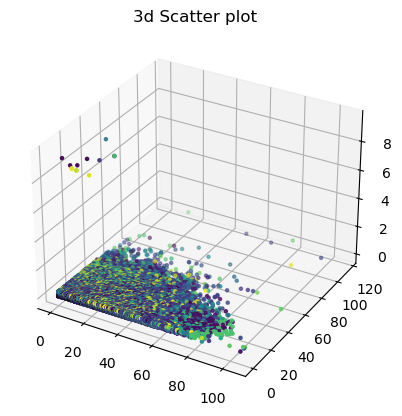

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

data=pd.read_csv('Proccessed.csv')
data=pd.DataFrame(data)

# del data["Entry_Date"]
# del data["Intra_Group_Similarity"]
# del data["Inter_Group_Difference"]
# del data["Genomic_Data"]

# "Entry_Date","Genetic_Group","Intra_Group_Similarity","Inter_Group_Difference","Genomic_Data"
fig = plt.figure()
ax = plt.axes(projection ='3d')

# Make it be ONLY year.
# data["Entry_Date"] = [pd.to_datetime(d).Year for d in data["Entry_Date"]]

# data["Entry_Date"]=(data["Entry_Date"]-data["Entry_Date"].mean())/data["Entry_Date"].std()

# data["Inter_Group_Difference"]=(data["Inter_Group_Difference"]-data["Inter_Group_Difference"].mean())/data["Inter_Group_Difference"].std()
# data["Intra_Group_Similarity"]=(data["Intra_Group_Similarity"]-data["Intra_Group_Similarity"].mean())/data["Intra_Group_Similarity"].std()
# data["Genomic_Data"]=(data["Genomic_Data"]-data["Genomic_Data"].mean())/data["Genomic_Data"].std()
# data["Genetic_Group"]=(data["Genetic_Group"]-data["Genetic_Group"].mean())/data["Genetic_Group"].std()

# ax.scatter(data['Inter_Group_Difference'], data['Intra_Group_Similarity'], data['Genomic_Data'], marker='*')
# ax.scatter(data['Inter_Group_Difference'], data['Intra_Group_Similarity'], data['Genetic_Group'],c=data['Genomic_Data'], marker='*')
ax.scatter( data["Inter_Group_Difference"],data['Intra_Group_Similarity'],data['Genomic_Data'],c=data['Genetic_Group'], marker='.')

#Genetic group had very little variation

# syntax for plotting
ax.set_title('3d Scatter plot')
plt.show()

#how about you standardise and then see it ?


In order to determine how many groups to create, I plotted Within Cluster Sum Square against k

<class 'numpy.ndarray'>
done.


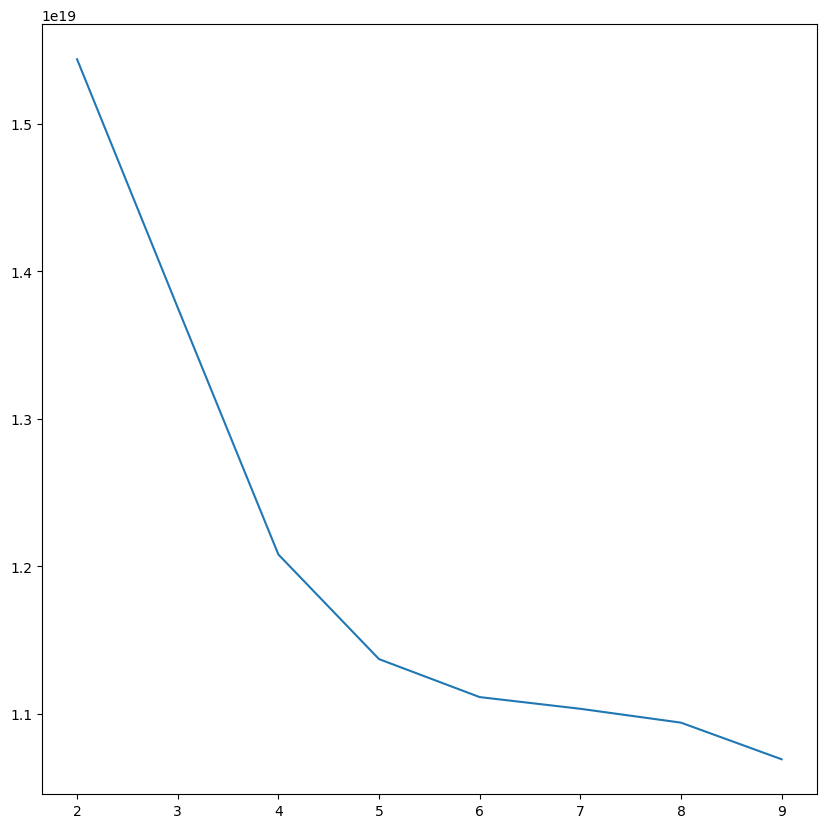

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
import random
import pickle

data=pd.read_csv('Proccessed.csv')
data=pd.DataFrame(data) #maybe using dataframe is y its taking so long
del data["Entry_Date"]
data=data.to_numpy()

print(type(data[1]))

def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

def addSeries(a,b):
    z=a.add(b, fill_value=0)
    z[0]=a[0]
    return z

def kMeans(k,df):
    clusters=[]
    dfcopy=df
#start by getting random centers
    for i in range(k):
        index=random.randint(0,data.shape[0])
        centi=data[index]
        clusters+=[[centi,[]]]
        # print(index)
    for i in range(5): #update the centroids 10 times
        # print("updating centroids",i)
        if i!=0:
            for n in range(k):
                clusters[n][0]=np.mean(clusters[n][1],axis=0) #get new centroids 
                clusters[n][1]=[] # Reset cluster list 
        for j in range(data.shape[0]): #find the centroid for each 
            minCentroid=[clusters[0][0],-1]
            datapoint=data[j]
            for n in range(k):
                if distance(clusters[n][0],datapoint)<=distance(minCentroid[0],datapoint):
                    minCentroid=[clusters[n][0],n]
            if minCentroid[1]==-1:
                print("ERROR: no centroid assigned")
            clusters[minCentroid[1]][1]+=[(datapoint)] #add it to the cluster
    for n in range(k):
            clusters[n][0]=np.mean(clusters[n][1],axis=0) #get final centroids
    return clusters

def WCSS(clusters):
    sum=0
    for clust in clusters:
        for point in clust[1]:
            sum+=distance(point,clust[0])**2 #distance function does root, WCSS does not
    return sum


K=[]
wcss=[]
for k in range(2,10):
    K+=[k]
    clusters=kMeans(k,data)
    wcss+=[WCSS(clusters)]


print("done.")

# "Entry_Date","Genetic_Group","Intra_Group_Similarity","Inter_Group_Difference","Genomic_Data"


fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.plot(K,wcss)

plt.show()


Seeing this, the elbow method was used to determine that k=5 is the number of clusters to make.

//Seeing the results of the 3 clusterings, it seems like genomic data is the main factor when it came to clustering
But since there were many missing values in the genomic data that was filled in by the mean, this is not the best

try use year as well

To tests the goodness of the different clustering, I decided to 
Plot the clusteres shown, or use the rating methods to see the things

<class 'numpy.ndarray'>
done.


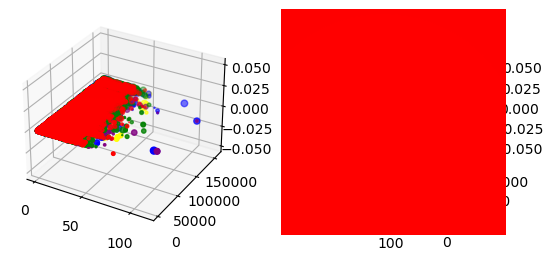

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
import random
import pickle

data=pd.read_csv('Proccessed.csv')
data=pd.DataFrame(data) 
del data["Entry_Date"]
data=data.to_numpy()

print(type(data[1]))

def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

def addSeries(a,b):
    z=a.add(b, fill_value=0)
    z[0]=a[0]
    return z

def kMeans(k,df):
    clusters=[]
    dfcopy=df
#start by getting random centers
    for i in range(k):
        index=random.randint(0,data.shape[0])
        centi=data[index]
        clusters+=[[centi,[]]]
        # print(index)
    for i in range(5): #update the centroids 10 times
        # print("updating centroids",i)
        if i!=0:
            for n in range(k):
                clusters[n][0]=np.mean(clusters[n][1],axis=0) #get new centroids 
                clusters[n][1]=[] # Reset cluster list 
        for j in range(data.shape[0]): #find the centroid for each 
            minCentroid=[clusters[0][0],-1]
            datapoint=data[j]
            for n in range(k):
                if distance(clusters[n][0],datapoint)<=distance(minCentroid[0],datapoint):
                    minCentroid=[clusters[n][0],n]
            if minCentroid[1]==-1:
                print("ERROR: no centroid assigned")
            clusters[minCentroid[1]][1]+=[(datapoint)] #add it to the cluster
    for n in range(k):
            clusters[n][0]=np.mean(clusters[n][1],axis=0) #get final centroids
    return clusters

k=5
clusters=kMeans(k,data)

# with open("clusters5.pkl","wb") as f:
#     pickle.dump(clusters,f)

print("done.")

# "Entry_Date","Genetic_Group","Intra_Group_Similarity","Inter_Group_Difference","Genomic_Data"

# fig = plt.subplots(1,2,)
# ax = plt.axes(projection='3d')
# ( data["Inter_Group_Difference"],data['Intra_Group_Similarity'],data['Genomic_Data'],c=data['Genetic_Group'], marker='.')
colours=['blue','green','yellow','purple','red']
for i in range(k): #change to datafram?
    plotlist=np.array(clusters[i][1]) 
    plt.subplot(1,2,1,projection='3d')
    plt.scatter(plotlist[:,2], plotlist[:,1],plotlist[:,3],c=colours[i], marker='.') # issue: list indices must be integers or slices, not tuple as in :,2 dont work
    ax.set_title('3d Scatter plot 0'+str(i))
    plt.subplot(1,2,2,projection='3d')
    plt.scatter(plotlist[:,2], plotlist[:,1],plotlist[:,0],c=colours[i], marker='.') # issue: list indices must be integers or slices, not tuple as in :,2 dont work
    ax.set_title('3d Scatter plot '+str(i))
# for i in range(k):
#     plotlist=np.array(clusters[i][1]) 
#     ax= fig.add_subplot(k, 1, i+1,projection='3d')
#     # print(plotlist.shape)
#     plot=ax.scatter(plotlist[:,2], plotlist[:,1],plotlist[:,3], marker='.') # issue: list indices must be integers or slices, not tuple as in :,2 dont work
#     ax.set_title('3d Scatter plot 0'+str(i))
#     plot=ax.scatter(plotlist[:,2], plotlist[:,1],plotlist[:,0], marker='.') # issue: list indices must be integers or slices, not tuple as in :,2 dont work
#     ax.set_title('3d Scatter plot '+str(i))
#     # plt.colorbar(plot,cax=ax)
    
plt.show()



NameError: name 'ax' is not defined

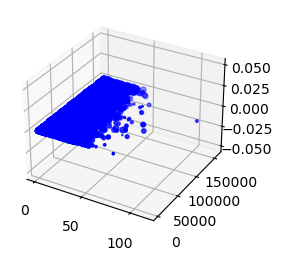

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
import random
import pickle

with open("clusters3.pkl","rb") as f:
    clusters=pickle.load(f)

k=3
colours=['blue','green','yellow','purple','red']
for i in range(k): #change to datafram?
    plotlist=np.array(clusters[i][1]) 
    plt.subplot(1,2,1,projection='3d')
    plt.scatter(plotlist[:,2], plotlist[:,1],plotlist[:,3],c=colours[i], marker='.') # issue: list indices must be integers or slices, not tuple as in :,2 dont work
    # ax.set_title('3d Scatter plot 0'+str(i))
    plt.subplot(1,2,2,projection='3d')
    plt.scatter(plotlist[:,2], plotlist[:,1],plotlist[:,0],c=colours[i], marker='.') # issue: list indices must be integers or slices, not tuple as in :,2 dont work
    # ax.set_title('3d Scatter plot '+str(i))


To test the goodness of the clustering, I then plot the Silluette score of the clusters:

For each cluster I sumed the silluette score of each point, if a clustere has a highly positive sum then it is considered good, otherwise it is considered bad